<a href="https://colab.research.google.com/github/sune-el/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Load data into the dataframe



In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium.plugins import HeatMap
import plotly.express as px


# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
file_path = "/content/drive/MyDrive/Hotel Bookings (1).csv"

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Replacing null values
df['children']=df['children'].fillna(0)
df['country']=df['country'].fillna('Undefined')
df['agent']=df['agent'].fillna(0)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**TOP 5 COUNTRIES WITH MAXIMUM NUMBER OF PASSENGERS**

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


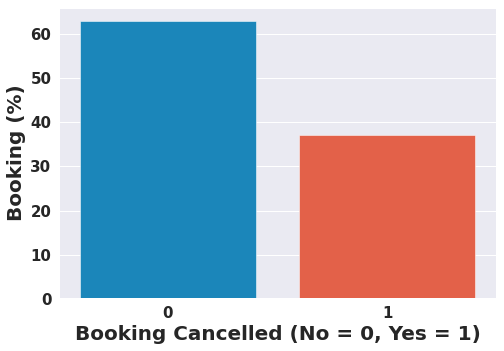

In [ ]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

**MORE THAN 60% OF THE PEOPLE DID NOT CANCEL THE BOOKING**

In [ ]:
#For further analysis, Select only those booking which did not get cancelled
df_not_canceled = df[df['is_canceled'] == 0]['is_canceled'].value_counts()
df_not_canceled

0    75166
Name: is_canceled, dtype: int64

In [ ]:
#Check how many different “hotel” and “customer” types are there
print("Hotel :",df['hotel'].unique())
print("Customers : ",df['customer_type'].unique())

Hotel : ['Resort Hotel' 'City Hotel']
Customers :  ['Transient' 'Contract' 'Transient-Party' 'Group']


**THERE ARE TWO TYPES OF HOTELS 1.RESORT HOTEL AND 2. CITY HOTEL**

In [ ]:
#Check the dataset for duplicate and dropping element
df.duplicated().sum()
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#From where the most guests are coming ?.
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

**People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.**

# **Which hotel contains maximum bookings**

In [ ]:
df['hotel'].agg(['value_counts'])

,value_counts
City Hotel,79330
Resort Hotel,40060


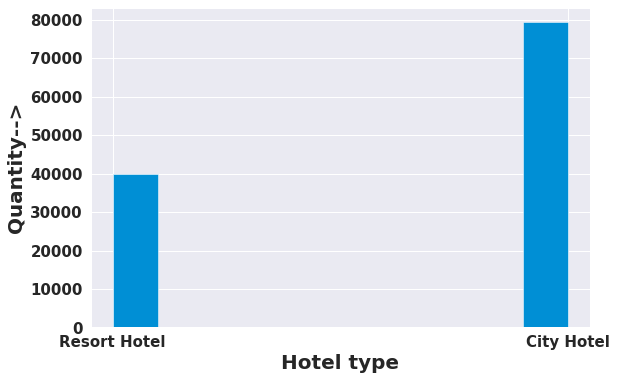

In [ ]:
plt.hist(df['hotel'])
plt.xlabel('Hotel type')
plt.ylabel('Quantity-->')
plt.show()

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

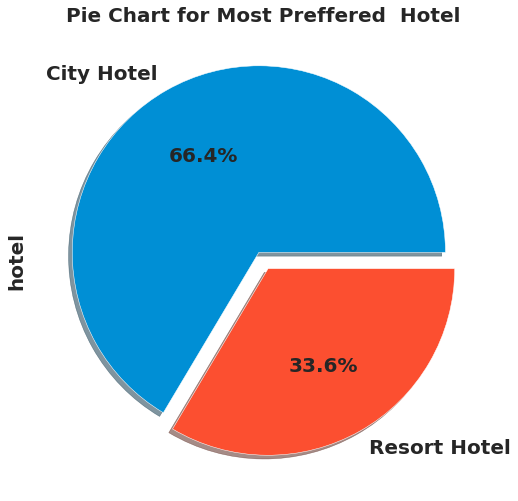

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

CITY HOTEL CONTAINS MAXIMUM NUMBER OF BOOKINGS COMPARED TO RESORT HOTEL

In [ ]:
# Price variation per night over the year?
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
#for resort hotel
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f"Resort Hotel \n {resort_hotel}")
print('\n')
#For city hotel
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f"city Hotel \n {city_hotel}")

Resort Hotel 
    arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.322236
3            February   54.147478
4             January   48.708919
5                July  150.122528
6                June  107.921869
7               March   57.012487
8                 May   76.657558
9            November   48.681640
10            October   61.727505
11          September   96.416860


city Hotel 
    arrival_date_month         adr
0               April  111.856824
1              August  118.412083
2            December   87.856764
3            February   86.183025
4             January   82.160634
5                July  115.563810
6                June  117.702075
7               March   90.170722
8                 May  120.445842
9            November   86.500456
10            October  101.745956
11          September  112.598452


In [ ]:
#FINAL PRICE
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


**Provide right hierarchy to month column.**

In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=fa93d2bac1c9afb2994494cffcd61378f091b56e39ad76f7d828153d82e17900
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=a10f898351f680a2bda07875a0613bcc14f75e7323a3693f4fe27d78204469f9
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [ ]:
#Room price per night over the Months
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

**This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn ***

**How Long People Stay in the hotel?**

In [ ]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



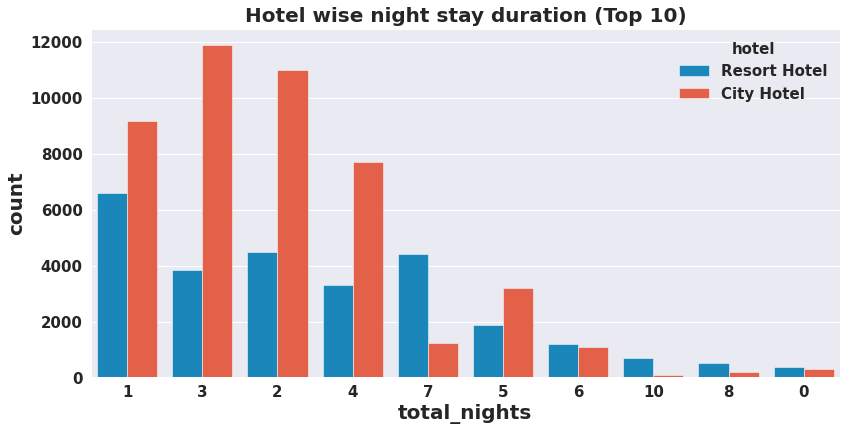

In [ ]:
#Hotel wise night stay duration
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

**MOST BUSY MONTHS**

In [ ]:
#Number of guest in resort hotel
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
print(f"Number of guest in resort hotel \n {resort_guests}")

#Number of guests in city hotel
print(f"\n")
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
print(f"Number of guests in city hotel \n {city_guests}")

Number of guest in resort hotel 
         month  no of guests
0      August          3257
1        July          3137
2     October          2577
3       March          2573
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2038
9    December          2017
10   November          1976
11    January          1868


Number of guests in city hotel 
         month  no of guests
0      August          5381
1        July          4782
2         May          4579
3        June          4366
4     October          4337
5   September          4290
6       March          4072
7       April          4015
8    February          3064
9    November          2696
10   December          2392
11    January          2254


In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [ ]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

**1. The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower.**

**2. Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Both hotels have the fewest guests during the winter.** 

In [ ]:
# How long do people stay at the hotels?
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [ ]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

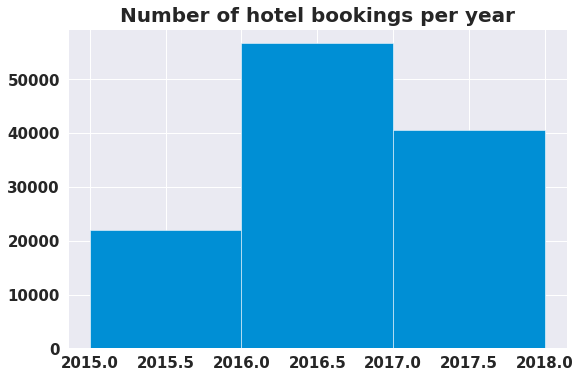

In [ ]:
#Number of bookings over time
plt.title("Number of hotel bookings per year")
plt.hist(df.arrival_date_year, bins=np.arange(2015, 2019, 1));


**Conclusion:**

**1.There has been many arrivals in the year 2016 than the remaning years.**

**2.  We can also say that there has been increase in the arrivals as years passes.**

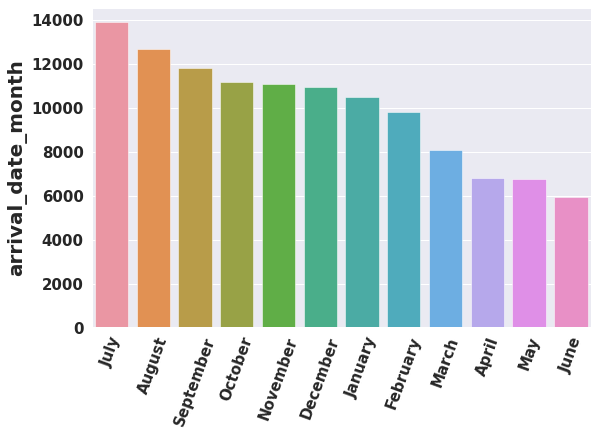

In [ ]:
#Booking demand over year
sns.barplot(x = df["arrival_date_month"].unique(), y = df["arrival_date_month"].value_counts());
plt.xticks(rotation=70);

**July is the most demanded month of the year. Interestingly, number of bookings decreased over year and June, the month before July, is the least demanded one. So, June is the best month of the year to go on holidays.**

**SPECIAL REQUESTS**

In [ ]:
df.total_of_special_requests.value_counts(normalize=True)*100

0    58.897730
1    27.829801
2    10.862719
3     2.091465
4     0.284781
5     0.033504
Name: total_of_special_requests, dtype: float64

**As we can see here among all one special booking request were made almost 27% of total bookings.Two special request were made nearly 10% among all and 3 special request is nearly 2%.**

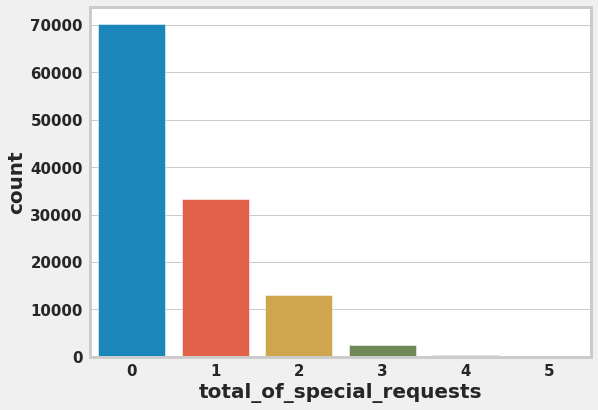

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

**Based on the exploration of Data we can say that:

1. During Summer Season the hotels are expected to get more no of bookings than any other seasons.

2. We can clearly see the average stay is between 1-3 days.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1440x1080 with 0 Axes>

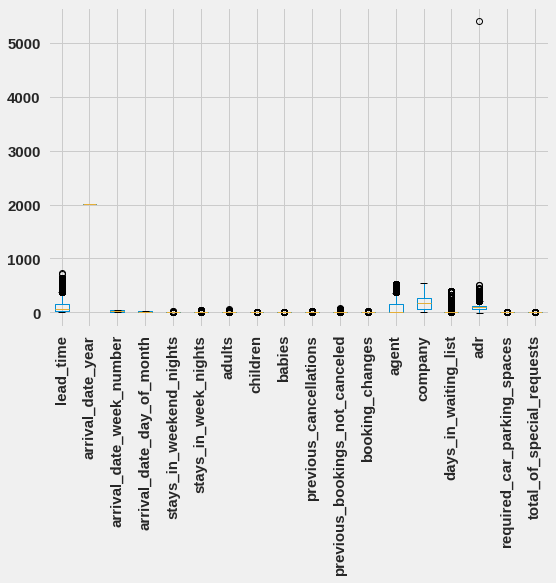

<Figure size 1440x1080 with 0 Axes>

In [ ]:
df.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

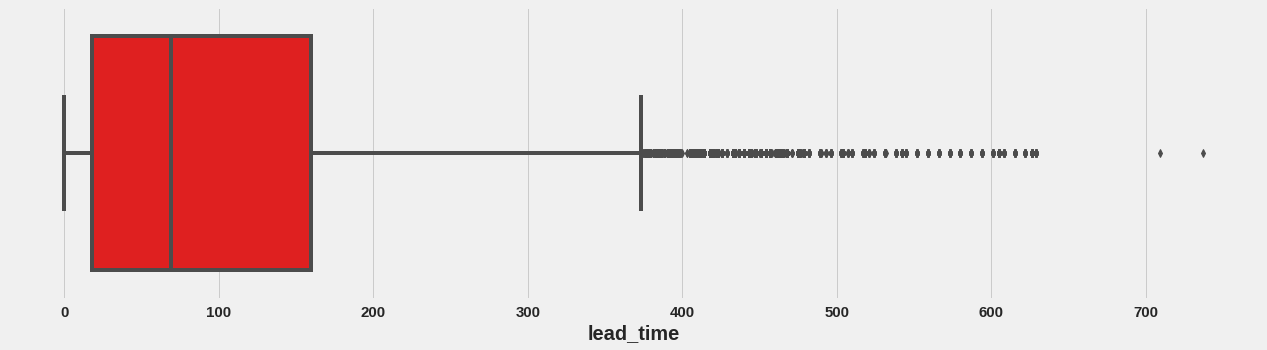

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['lead_time'],color='Red')

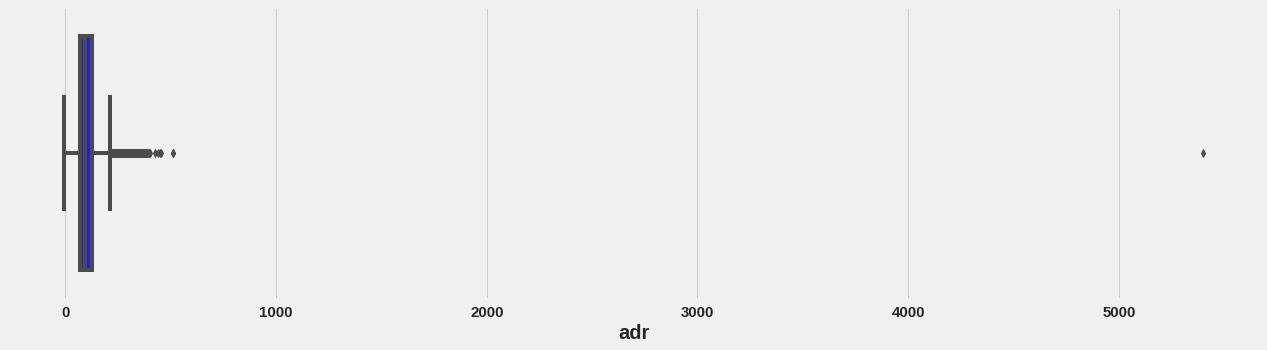

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['adr'],color='Blue')

In [ ]:
#Removed an extreme outlier
df_new=df.drop(df[df['adr']==5400c].index,axis=0,inplace=False)

SyntaxError: ignored

Which Hotel has the more lead time 

In [ ]:
#group by hotel and taking mean of lead time
avg_lead_time=df.groupby('hotel')['lead_time'].mean().reset_index()

plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

Which is the most busiest month

In [ ]:
df.groupby('hotel')['arrival_date_month'].value_counts()

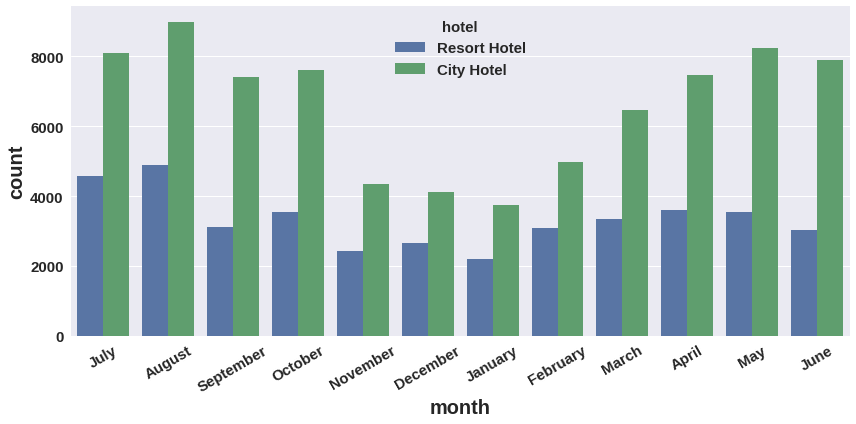

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
mn=sns.countplot(x='arrival_date_month',hue='hotel',data=df)
mn.set(xlabel='month',ylabel='count')
p=plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Comparision of Hotels 

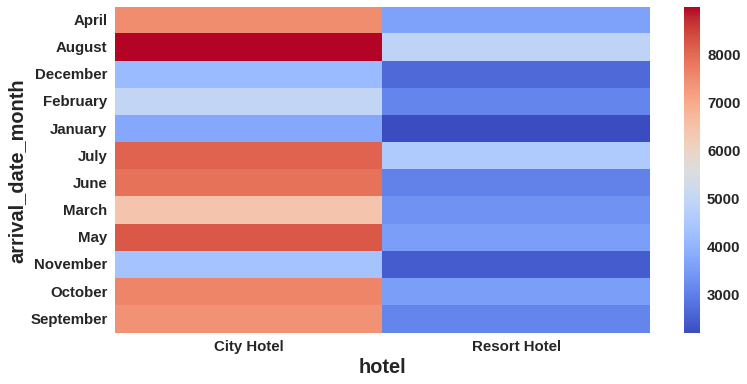

In [ ]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

Guest arrival trend weekwise

In [ ]:
df1=df[df['is_canceled']=='No']

Stays by users

In [ ]:
#adding new column [total_nights]
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
df[['total_nights']]

,total_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


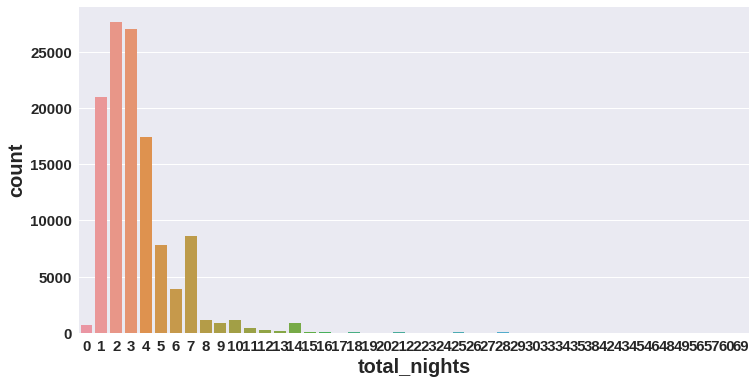

In [ ]:
sns.countplot(x='total_nights',data=df)

In [ ]:
stay_days = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay_days = stay_days.iloc[:, :3]                                                   # take 1st 3 columns
stay_days = stay_days.rename(columns={'is_canceled':'Number of stays'})    # rename the columns
stay_days

,total_nights,hotel,Number of stays
0,0,City Hotel,331
1,0,Resort Hotel,384
2,1,City Hotel,13272
3,1,Resort Hotel,7748
4,2,City Hotel,21426
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


Text(0.5, 0, 'total_stay in days')

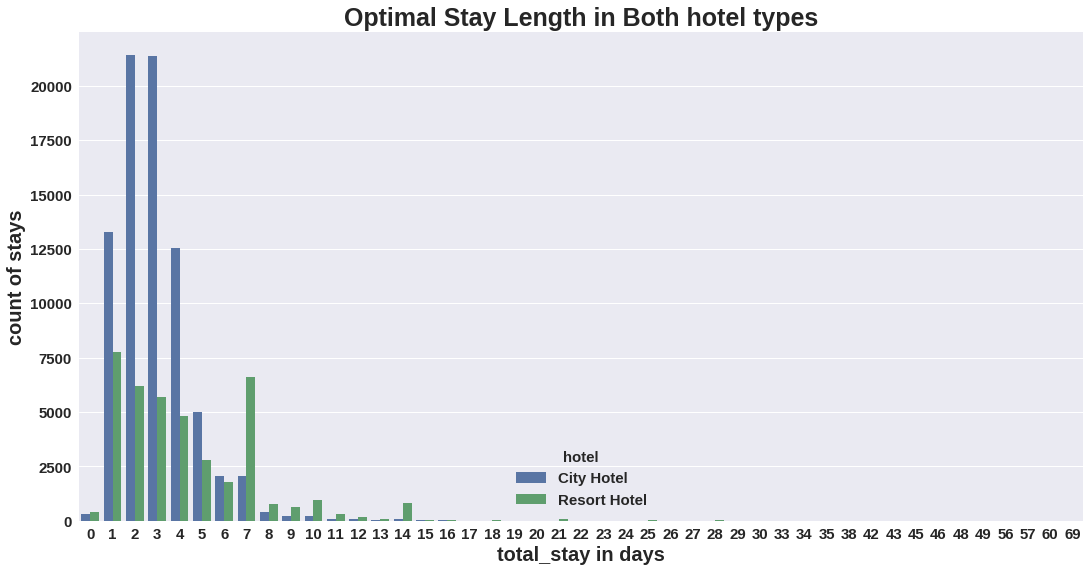

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_nights',y='Number of stays',hue='hotel',data=stay_days)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay in days')

From where the most guests coming

In [ ]:
df['country'].agg(['value_counts'])
country=list(df['country'].unique())[:6]
count_of_country=list(df['country'].agg('value_counts'))[:6]


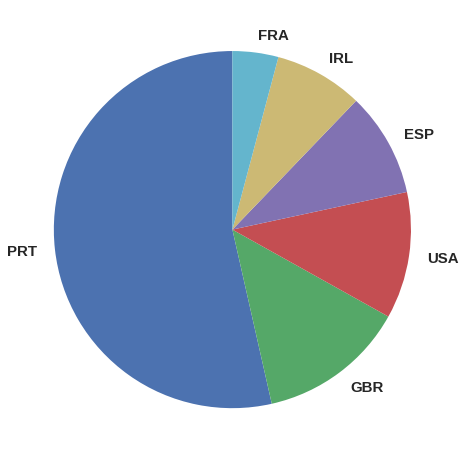

In [ ]:
plt.figure(figsize=(8,10))
plt.pie(count_of_country,labels=country,startangle=90)
plt.show()

In [ ]:
monthly_mean_adr=pd.DataFrame(df.groupby(['hotel','arrival_date_month'])['adr'].mean())
monthly_mean_adr

adr
hotel        arrival_date_month            
City Hotel   April               111.251838
             August              114.680455
             December             88.826307
             February             85.088278
             January              82.628986
             July                110.734292
             June                119.074341
             March                92.643116
             May                 121.638560
             November             88.069601
             October              99.974498
             September           110.004661
Resort Hotel April                77.849496
             August              186.790574
             December             68.984230
             February             55.171930
             January              49.461883
             July                155.181299
             June                110.444749
             March                57.520147
             May                  78.758134
             November             48.273993
             October              62.097617
             September            93.252030

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

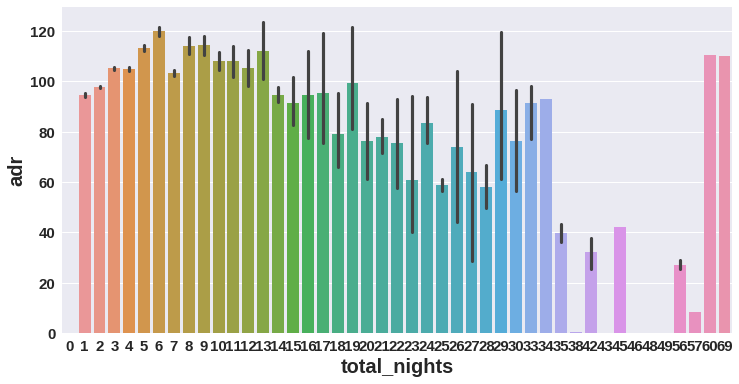

In [ ]:
sns.barplot(x='total_nights',y='adr',data=df)

Effect of lead time on cancellation(not complete)



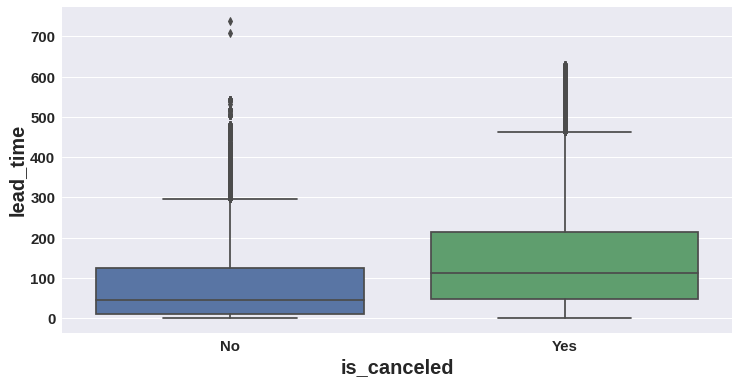

In [ ]:
df2=df[df['is_canceled']=='Yes']
sns.boxplot(x='is_canceled',y='lead_time',data=df)

Which type of customers more likely to cancel the bookings

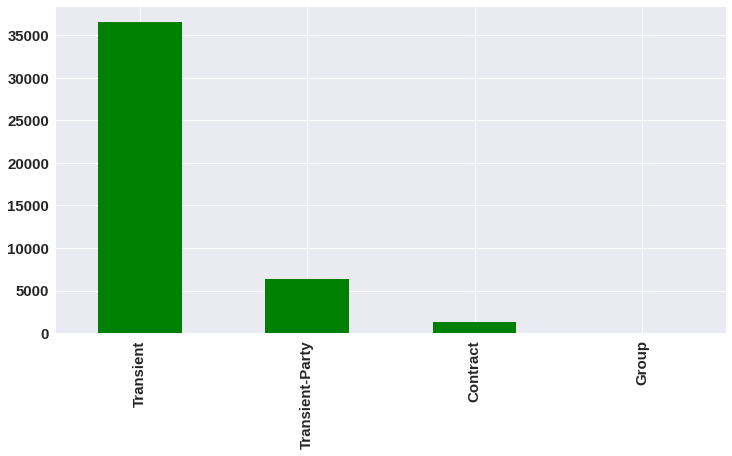

In [ ]:
df2['customer_type'].agg('value_counts').plot(kind='bar',color='g')

Count of deposit type which are canceled in each hotel

In [ ]:
df2['deposit_type'].agg('value_counts')

No Deposit    29694
Non Refund    14494
Refundable       36
Name: deposit_type, dtype: int64

In [ ]:
deposit=list(df2['deposit_type'].unique())
count=list(df2['deposit_type'].agg('value_counts'))
colors=['Grey','Purple','Green']


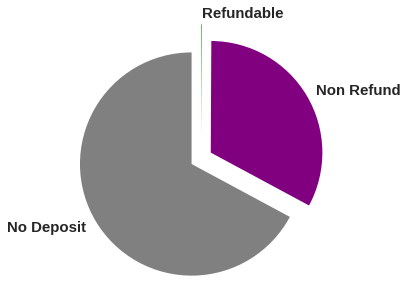

In [ ]:
plt.figure(figsize=(5,7))
plt.pie(count,labels=deposit,colors=colors,explode=(0.1,0.1,0.2),startangle=90)
plt.show()

Special requests according to adult count(not complete)

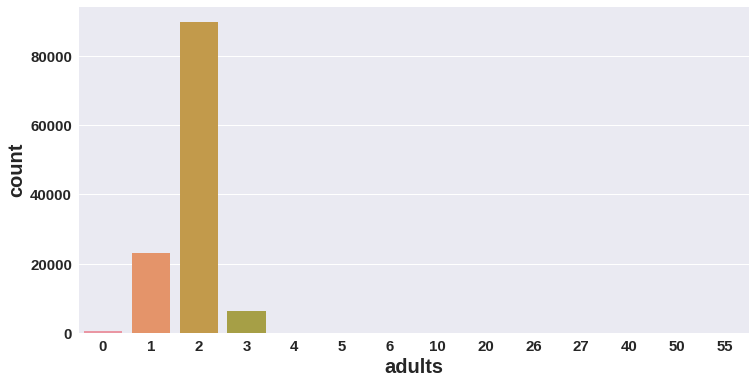

In [ ]:
sns.countplot(x='adults',data=df)

Special requests by country

In [ ]:
d=df.groupby('country')['total_of_special_requests'].mean().sort_values(ascending=False)[:50]

Text(0.5, 1.0, 'top 50 countries by average number of special requests')

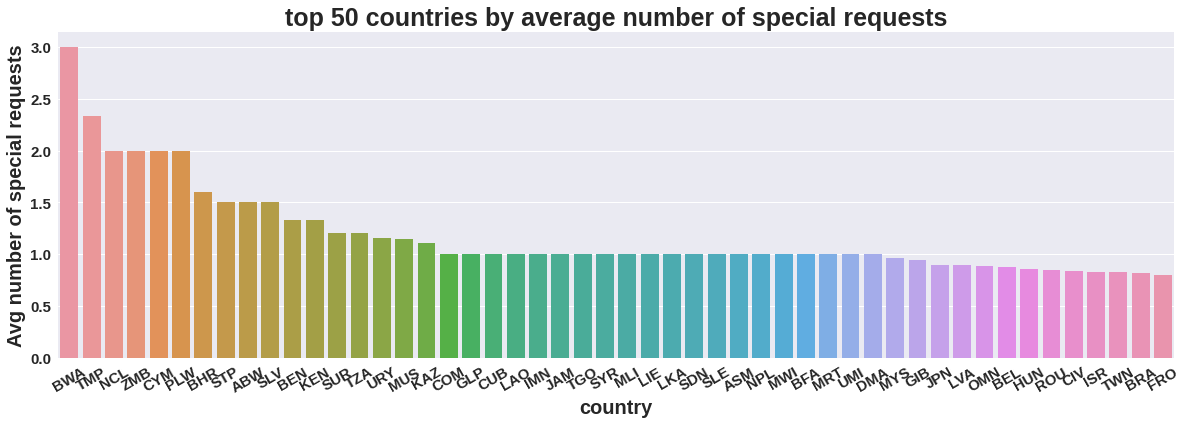

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x=d.index,y=d)
p=plt.xticks(rotation=30)
plt.xlabel('country')
plt.ylabel('Avg number of special requests')
plt.title('top 50 countries by average number of special requests')

Avg number of special requests are almost constant for each country.So i think they are not entertaining much special requests.

Special requests by customer type

Text(0.5, 1.0, 'Average number of special requests by customer type')

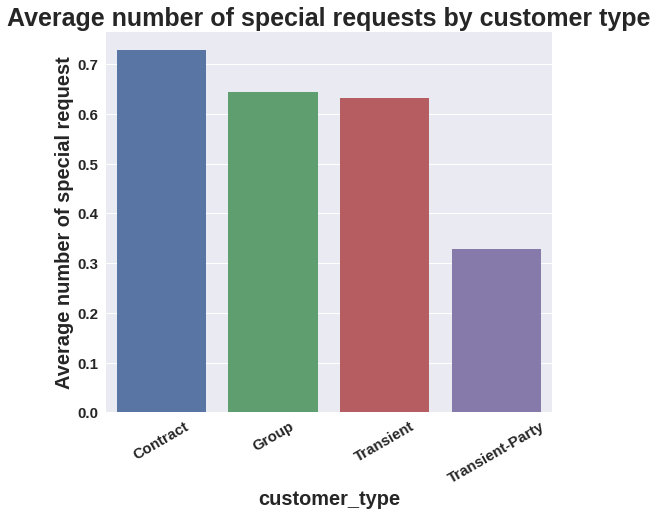

In [ ]:
df3=df.groupby('customer_type')['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=df3.index,y=df3)
p=plt.xticks(rotation=30)
plt.xlabel('customer_type')
plt.ylabel('Average number of special request')
plt.title('Average number of special requests by customer type')


Average special requests made per guest across months in each year

In [ ]:
df_2015=df[df['arrival_date_year']==2015]
df_2016=df[df['arrival_date_year']==2016]
df_2017=df[df['arrival_date_year']==2017]

Text(0.5, 1.0, 'Avg special requests made per guest across months in 2015')

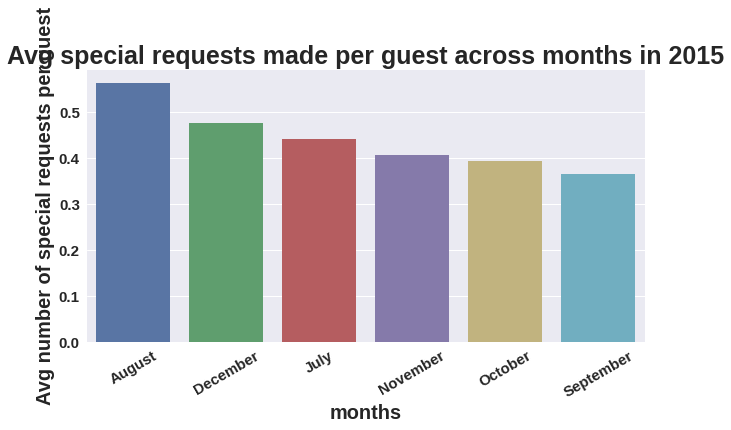

In [ ]:
df4=df_2015.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=df4.index,y=df4)
p=plt.xticks(rotation=30)
plt.xlabel('months')
plt.ylabel('Avg number of special requests per guest')
plt.title('Avg special requests made per guest across months in 2015')


Text(0.5, 1.0, 'Avg special requests made per guest across months in 2016')

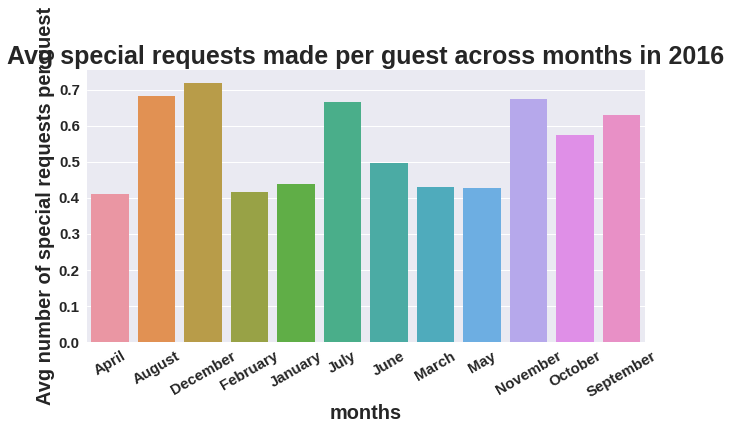

In [ ]:
df4=df_2016.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=df4.index,y=df4)
p=plt.xticks(rotation=30)
plt.xlabel('months')
plt.ylabel('Avg number of special requests per guest')
plt.title('Avg special requests made per guest across months in 2016')


Text(0.5, 1.0, 'Avg special requests made per guest across months in 2017')

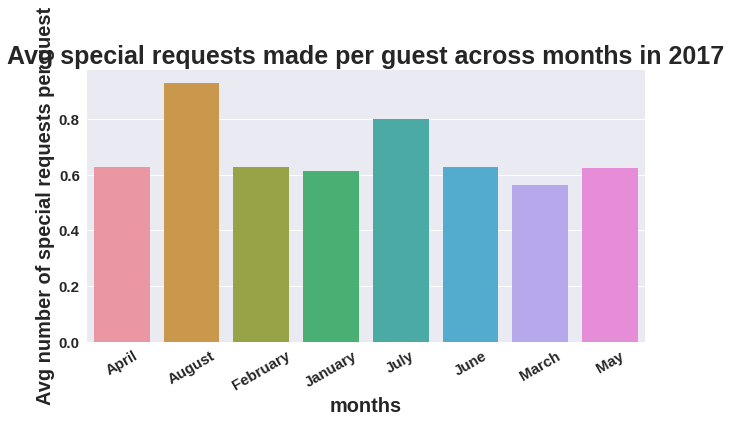

In [ ]:
df4=df_2017.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=df4.index,y=df4)
p=plt.xticks(rotation=30)
plt.xlabel('months')
plt.ylabel('Avg number of special requests per guest')
plt.title('Avg special requests made per guest across months in 2017')

Daily rate by hotel type

In [ ]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Daily Rate by hotel type')

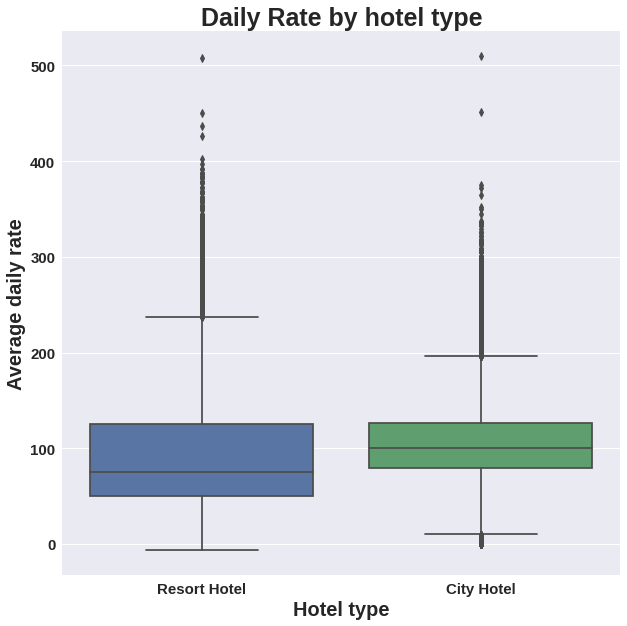

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='hotel',y='adr',data=df_new)
plt.ylabel('Average daily rate')
plt.xlabel('Hotel type')
plt.title('Daily Rate by hotel type')

In [ ]:
df[df['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
48515,City Hotel,Yes,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,No,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,1


Text(0.5, 1.0, 'Daily rate by hotel type')

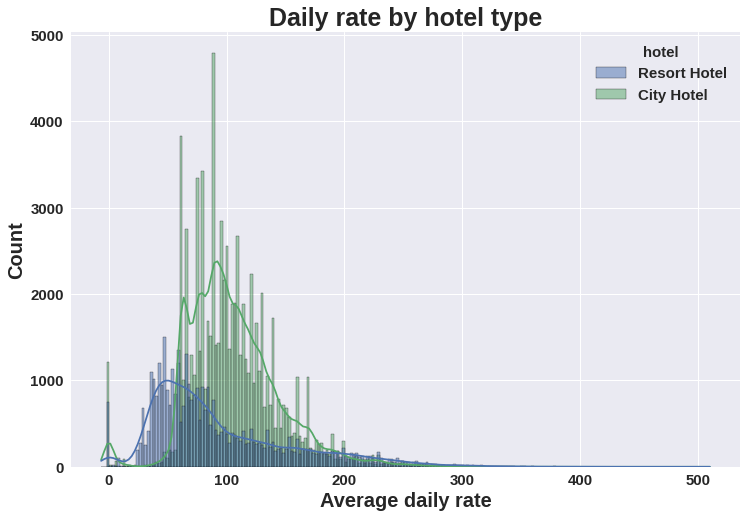

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(x='adr',hue='hotel',data=df_new,kde=True)
plt.xlabel('Average daily rate')
plt.title('Daily rate by hotel type')

In [ ]:
#removing undefined rows
df=df.drop(df[df.market_segment=='Undefined'].index)

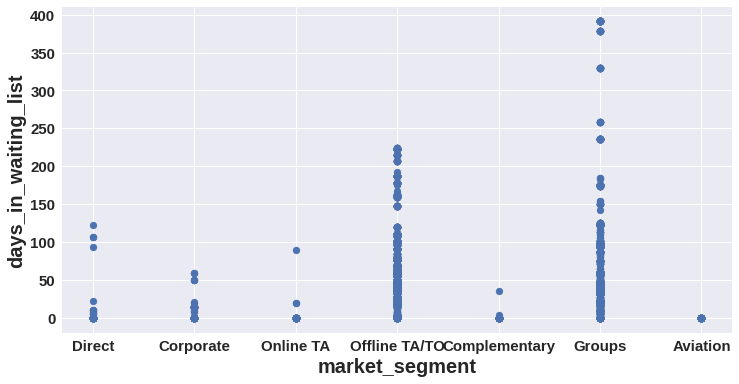

In [ ]:
plt.scatter(df['market_segment'],df['days_in_waiting_list'])
plt.xlabel('market_segment')
plt.ylabel('days_in_waiting_list')
plt.show()

Which distribution channel is mostly prefered

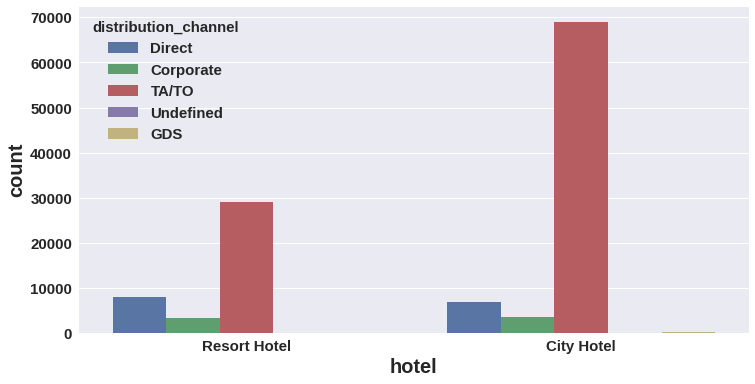

In [ ]:
df.groupby(['hotel'])['distribution_channel'].agg('value_counts')
sns.countplot(x='hotel',hue='distribution_channel',data=df)

Which room types are mostly reserved

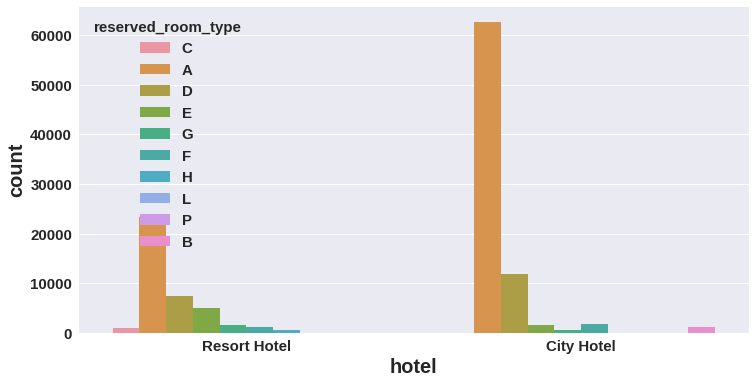

In [ ]:
df.groupby('hotel')['reserved_room_type'].agg('value_counts')
sns.countplot(x='hotel',hue='reserved_room_type',data=df)

Relation between Repeated guests and Previas booking

In [ ]:
repeated_guests_df=df[df['is_repeated_guest']==1]
repeated_guests_df_1=df[df['is_repeated_guest']==0]

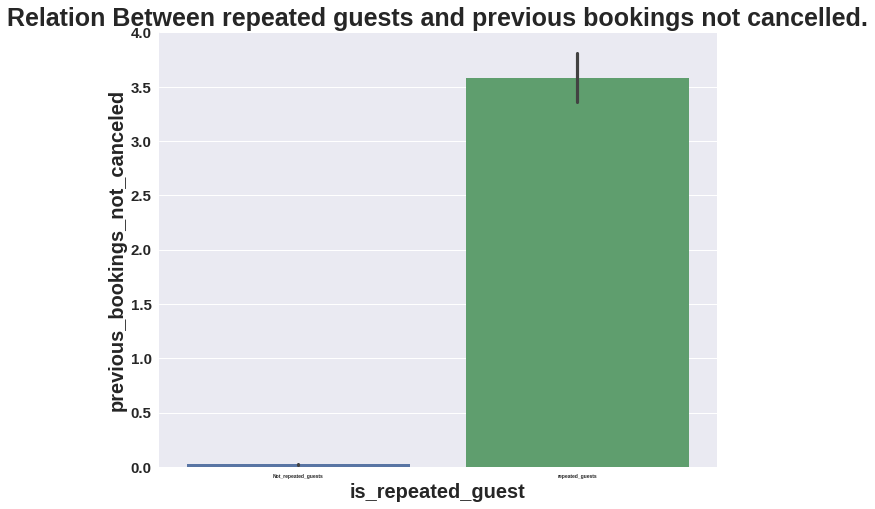

In [ ]:
# plotting the figure
plt.figure(figsize=(10,8))
sns.barplot(x=df['is_repeated_guest'],y= df['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=5)
plt.title('Relation Between repeated guests and previous bookings not cancelled.')
plt.show()



adr  relation with distribution channel


Text(0.5, 1.0, 'ADR for Distribution channel')

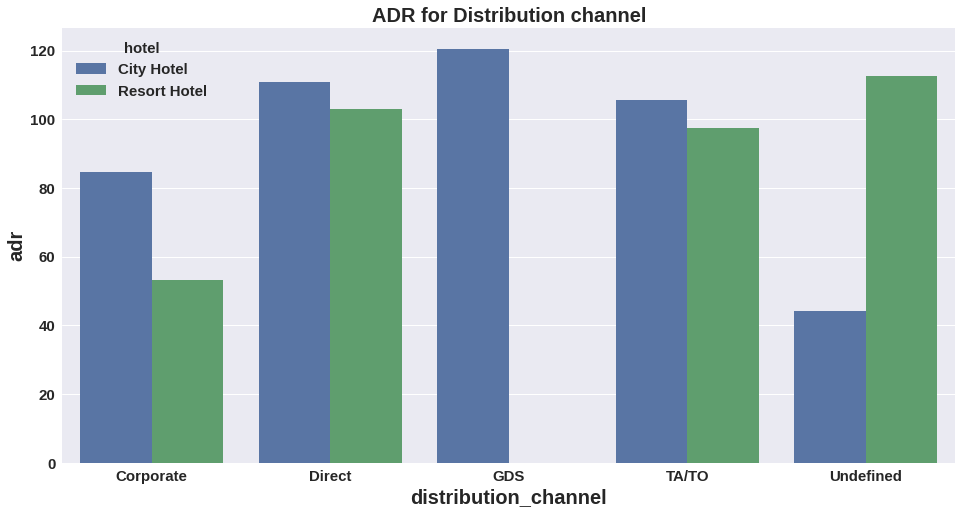

In [ ]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR for Distribution channel')

How many visitors get room which they reserved(not complete)